In [40]:
## import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

In [41]:
exp_name = "connectivity_accuracy_dilemma"
N = 680
d = 12800
s = 9
m = 20
rho_list = [0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.95]
# rho_list = [0,0.4]
iter_type = "projected"
gamma = 0.08789
total = 30

-------
0.2 0.005539655193024082
0.2 0.0085305323537463
0.2 0.0071198610961633185
0.2 0.00593102436988794
0.2 0.006065848057772628
0.2 0.00823398579964468
0.2 0.007697245674867628
0.2 0.008919508388212979
0.2 0.009951352086968158
0.2 0.009778157956950332
0.2 0.0072775286238817155
0.2 0.008379689137765298
0.2 0.008358732456685815
0.2 0.010804400983934188
0.2 0.010173967623120192
0.2 0.009454081148608648
0.2 0.006748558671748732
0.2 0.007089179905507938
0.2 0.0076039534271391445
0.2 0.008245079561204844
0.2 0.007519400073453937
0.2 0.009250457514271056
0.2 0.007640751898323724
0.2 0.011099916888021632
0.2 0.007813180307650474
0.2 0.005806187598063717
0.2 0.00729359563279858
0.2 0.007132829240638114
0.2 0.007631094190581962
0.2 0.008735875837639889
0.3 0.005627323172961088
0.3 0.008578471222479615
0.3 0.007164907626712236
0.3 0.005966460066669926
0.3 0.006137064596995673
0.3 0.008248338136725823
0.3 0.007719237602641702
0.3 0.009041674190336196
0.3 0.009792602779721726
0.3 0.0097693325024

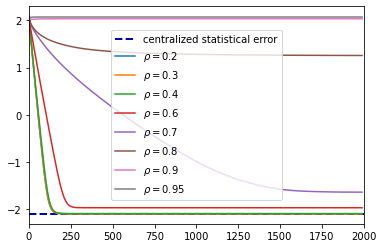

In [42]:
length = 2000
mask = np.arange(0, length, 10)
x = np.arange(0, length)


centralized_loss = []
for num_exp in range(total):
    filename = "../output/{}/N{}_d{}_s{}_exp{}/centralized_gamma{}.output".format(exp_name, N, d, s, num_exp, gamma)
    _, loss = pickle.load(open(filename, "rb"))
    centralized_loss.append(loss[-1])
    
centralized_logloss = np.log10(np.mean(centralized_loss))
plt.axhline(y=centralized_logloss, c="#0000ab",  linestyle='--', linewidth=2, label="centralized statistical error")
print("-------")
for rho in rho_list:
    loss_matrix = []
    
    for num_exp in range(total):
        filename = "../output/{}/N{}_d{}_s{}_exp{}/distributed_m{}_rho{}_gamma{}.output".format(exp_name, N, d, s, num_exp, m, rho, gamma)
        theta, loss = pickle.load(open(filename, "rb"))        
        if len(loss) < length:
            print("WARNING: the total iteration number is less than the required length, manually adjusted")
            loss = np.array(loss + (length-len(loss_matrix))*[loss_matrix[-1]])
        else:
            loss = np.array(loss)
        print(rho, loss[-1])

        loss_matrix.append(loss)

    plt.plot(x[mask], np.log10(np.mean(loss_matrix, axis=0))[mask], label=r"$\rho={}$".format(rho))
    plt.xlim(0,length)
    # plt.ylim(-2.2,-1.7)
    plt.legend()
# plt.show()
tikzplotlib.save('floor.tex')

In [43]:
exp_name = "connectivity_accuracy_dilemma"
N_list = [240,320,420,520,560,680]
d_list = [400,800,1600,3200,6400,12800]
s_list = [5,6,7,8,8,9]
m = 20
rho_list = [0.2,0.4,0.6,0.7,0.8,0.9,0.95]
# rho_list = [0,0.4]
iter_type = "projected"
gamma = 0.08789
total = 30

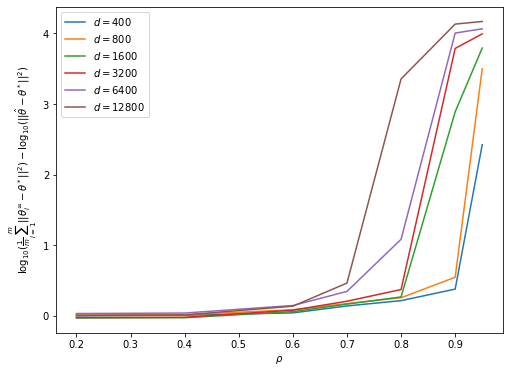

In [44]:
plt.figure(figsize=(8,6))

centralized_loss = []
for i,d in enumerate(d_list):
    N = N_list[i]
    s = s_list[i]
    for num_exp in range(total):
        filename = "../output/{}/N{}_d{}_s{}_exp{}/centralized_gamma{}.output".format(exp_name, N, d, s, num_exp, gamma)
        _, loss = pickle.load(open(filename, "rb"))
        centralized_loss.append(loss[-1])

    centralized_logloss = np.log10(np.mean(centralized_loss))
    loss_matrix = []
    for rho in rho_list:
        loss_total = []
        for num_exp in range(total):
            filename = "../output/{}/N{}_d{}_s{}_exp{}/distributed_m{}_rho{}_gamma{}.output".format(exp_name, N, d, s, num_exp, m, rho, gamma)
            theta, loss = pickle.load(open(filename, "rb"))        
            loss_total.append(loss[-1])
        loss_matrix.append(np.mean(loss_total))
    plt.plot(np.array(rho_list), np.log10(loss_matrix)-centralized_logloss, label=r"$d={}$".format(d))
    # plt.ylim(-2.2,-1.7)
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$\log_{10}(\frac{1}{m}\sum_{i=1}^{m}||\theta_i^\infty-\theta^*||^2)-\log_{10}(||\hat{\theta}-\theta^*||^2)$")
plt.legend()
# plt.show()
tikzplotlib.save('floor.tex')